In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns

In [68]:
dataset=pd.read_csv('Cyber_criminal_profiling.csv')
dataset.shape

(60, 10)

In [69]:
dataset.head()

,first_name,last_name,Technical_trait,Personal_trait,Social_characteristics,Technical_traits,Personal_traits,Social_characteristic,Class,Criminal
0,Hall,Buxsey,0.169630,0.332569,0.092554,0.2,0.3,0.1,0.6,0
1,Roselin,Vlasenko,0.844385,0.934350,0.378125,0.8,0.9,0.4,2.1,1
2,Anatole,Colecrough,0.363624,0.892332,0.043836,0.4,0.9,0.0,1.3,0
3,Bryana,O'Crevan,0.218067,0.020410,0.861217,0.2,0.0,0.9,1.1,0
4,Ferdie,Cussons,0.336268,0.203978,0.203958,0.3,0.2,0.2,0.7,0


In [70]:
dataset.drop(['first_name', 'last_name'], axis='columns', inplace=True)


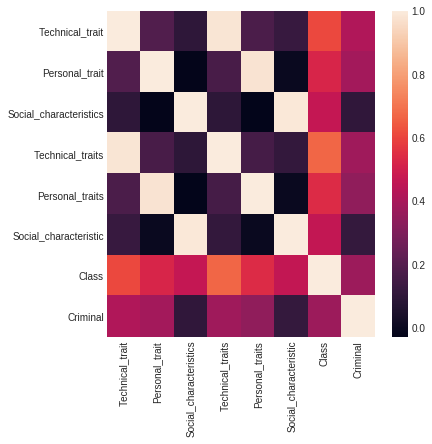

In [71]:
# viewing the correlations
correlation = dataset.corr()
plt.figure(figsize = (6 , 6))
sns.heatmap(correlation)

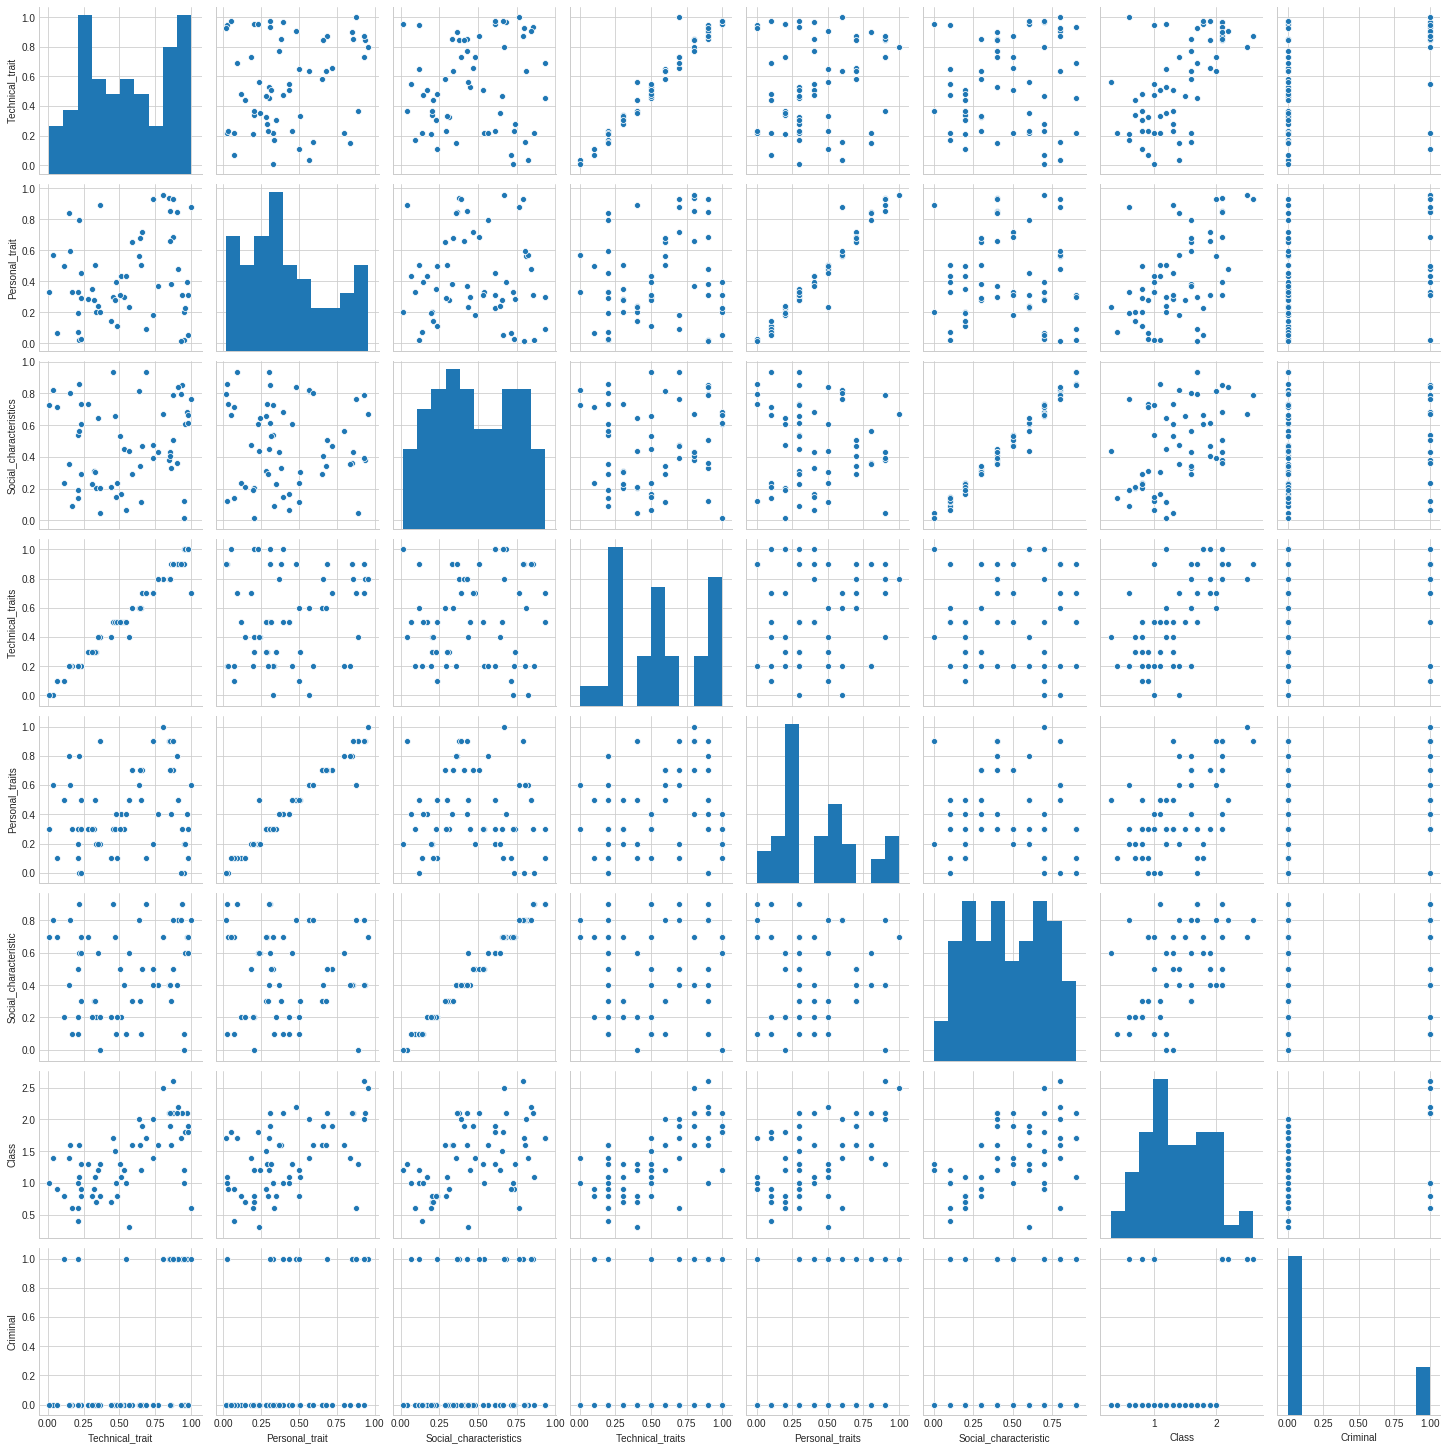

In [72]:
from matplotlib import style
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,10)
sns.pairplot(dataset)


In [73]:
from sklearn.neighbors import KNeighborsClassifier
dataset.head()

,Technical_trait,Personal_trait,Social_characteristics,Technical_traits,Personal_traits,Social_characteristic,Class,Criminal
0,0.169630,0.332569,0.092554,0.2,0.3,0.1,0.6,0
1,0.844385,0.934350,0.378125,0.8,0.9,0.4,2.1,1
2,0.363624,0.892332,0.043836,0.4,0.9,0.0,1.3,0
3,0.218067,0.020410,0.861217,0.2,0.0,0.9,1.1,0
4,0.336268,0.203978,0.203958,0.3,0.2,0.2,0.7,0


In [81]:
X=dataset[['Technical_traits','Personal_traits','Social_characteristic','Class']]
y=dataset[['Criminal']]


In [82]:
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: Criminal, dtype: int64

In [83]:
X.head()

,Technical_traits,Personal_traits,Social_characteristic,Class
0,0.2,0.3,0.1,0.6
1,0.8,0.9,0.4,2.1
2,0.4,0.9,0.0,1.3
3,0.2,0.0,0.9,1.1
4,0.3,0.2,0.2,0.7


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [85]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)


/home/sushmita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [87]:
y_pred = classifier.predict(X_test)


In [88]:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  1]
 [ 0  0]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.00      0.00      0.00         0

    accuracy                           0.92        12
   macro avg       0.50      0.46      0.48        12
weighted avg       1.00      0.92      0.96        12



/home/sushmita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
print("Mean absolute error =", sklearn.metrics.mean_absolute_error(y_test, y_pred)) 
print("Mean squared error =", sklearn.metrics.mean_squared_error(y_test,y_pred)) 
print("Median absolute error =", sklearn.metrics.median_absolute_error(y_test,y_pred)) 
print("Explain variance score =", sklearn.metrics.explained_variance_score(y_test, y_pred)) 
print("R2 score =", sklearn.metrics.r2_score(y_test, y_pred))

Mean absolute error = 0.08333333333333333
Mean squared error = 0.08333333333333333
Median absolute error = 0.0
Explain variance score = 0.0
R2 score = 0.0
